<a href="https://colab.research.google.com/github/tfysekis/Data-Mining/blob/master/Mining_Knowledge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise 1. Transformation and analysis of raw data**

We download the contect of the .csv file that we are working on (GroceriesInitial.csv)

In [ ]:
!gdown --id 1qklC6HBqynRmhn5q-zY3Ov2a0jcCwT9s

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qklC6HBqynRmhn5q-zY3Ov2a0jcCwT9s
To: /content/GroceriesInitial.csv
100% 823k/823k [00:00<00:00, 29.5MB/s]


Now we are storing the data with the help of the pandas library so we can manage them.

In [ ]:
import pandas as pd 

data = pd.read_csv('GroceriesInitial.csv', delimiter=',', header='infer')

Now that we have the data into a DataFrame we can start,this a quick glimpse of the data to check if it was properly loaded into the DataFrame

In [ ]:
data.head()

,id,basket_value,recency_days,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,...,Item_23,Item_24,Item_25,Item_26,Item_27,Item_28,Item_29,Item_30,Item_31,Item_32
0,1,1.1,2,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3.6,31,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.2,7,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6.6,7,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2.5,66,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A descriptive statistics summary for the basket_value column.

In [ ]:
data['basket_value'].describe()

count    7536.000000
mean        5.036584
std         3.692088
min         1.100000
25%         2.200000
50%         4.100000
75%         7.000000
max        25.100000
Name: basket_value, dtype: float64

Now we are going to visual our data for the basket_value,in general,a reasonable number of bins for a histogram is the square root of the number of observations in the dataset.We have aroud 7.500 items in our case, the square root of 7500 is approximately 87, so we could start by using 87 bins in our histogram.

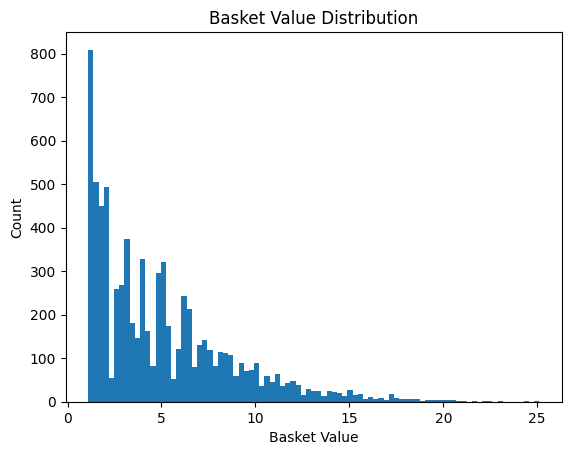

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(data['basket_value'], bins=87)
plt.title('Basket Value Distribution')
plt.xlabel('Basket Value')
plt.ylabel('Count')
plt.show()

The histogram of the 'basket_value' variable shows a skewed right distribution, which indicates that there are relatively few high-value purchases that are driving up the overall average basket value.In this case, the histogram shows that there are a small number of customers who are making large purchases, while the majority of customers are making smaller purchases.This is reflected in the long tail stretching out to the right of the histogram, which indicates that there are relatively few high-value purchases compared to the number of low to medium-value purchases.

Now we are going for the box plot visualisation:

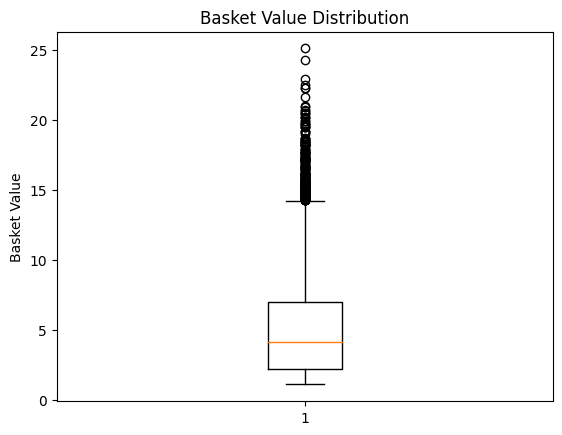

In [ ]:
plt.boxplot(data['basket_value'])
plt.title('Basket Value Distribution')
plt.ylabel('Basket Value')
plt.show()

The box represents the middle 50% of the data,based on this plot, we can see that the 'basket_value' variable is positively skewed, with a long tail of high values that fall outside of the range of the rest of the data. The median value is relatively low compared to the range of values in the data, which is a common characteristic of positively skewed data.

There are several outliers (represented by the dots outside the whiskers) that fall far outside of the range of the rest of the data.


**Together, these two plots suggest that the majority of customers have relatively low basket values, but there are a few customers with very high basket values that are driving up the overall distribution.**

Now we want to study certain products in our data.So we will replace the Item columns with the products that we want.Also we will make binary values,if the costumers bought the product is equal to 1.

In [ ]:
# Define the items to keep
items_to_keep = ['citrus fruit', 'tropical fruit', 'whole milk', 'other vegetables', 'rolls/buns', 'chocolate', 'bottled water', 'yogurt', 'sausage', 'root vegetables', 'pastry', 'soda', 'cream']

# Insert new columns for each item in items_to_keep
for item in items_to_keep:
    data[item] = data.apply(lambda row: 1 if item in str(row.values) else 0, axis=1)
data.head()


,id,basket_value,recency_days,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,...,other vegetables,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,pastry,soda,cream
0,1,1.1,2,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2,3.6,31,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
2,3,1.2,7,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,4,6.6,7,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
4,5,2.5,66,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0


Now are going to delete the Item columns because we dont need them anymore and print thre results.

In [ ]:
# Drop the Item columns
data.drop(columns=[f'Item_{i}' for i in range(1, 33)], inplace=True)
data.head()

,id,basket_value,recency_days,citrus fruit,tropical fruit,whole milk,other vegetables,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,pastry,soda,cream
0,1,1.1,2,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3.6,31,0,1,0,0,0,0,0,1,0,0,0,0,0
2,3,1.2,7,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,6.6,7,0,0,0,0,0,0,0,1,0,0,0,0,1
4,5,2.5,66,0,0,1,1,0,0,0,0,0,0,0,0,0


We are going to change the basket_value into 3 new types, low_value_basket, medium_value_basket and high_value_basket.

**low_value_basket**:if the basket_value column is less than half of the average value 

**medium_value_basket**: if the value in the basket_value column is greater than or equal to half of the average value but less than the average value itself.


**high_value_basket**:if the value in the basket_value column is greater than or equal to the average value.

In [ ]:
# Calculate average basket value
avg_basket_value = data['basket_value'].mean()

# Create new column for basket category
data.insert(2, 'basket_category', '')

# Loop through rows and assign basket category based on basket value
for i, row in data.iterrows():
    if row['basket_value'] < avg_basket_value/2:
        data.at[i, 'basket_category'] = 'low_value_basket'
    elif row['basket_value'] >= avg_basket_value/2 and row['basket_value'] < avg_basket_value*2:
        data.at[i, 'basket_category'] = 'medium_value_basket'
    else:
        data.at[i, 'basket_category'] = 'high_value_basket'

# Drop original basket value column
data.drop(columns=['basket_value'], inplace=True)

data.head()

,id,basket_category,recency_days,citrus fruit,tropical fruit,whole milk,other vegetables,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,pastry,soda,cream
0,1,low_value_basket,2,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,medium_value_basket,31,0,1,0,0,0,0,0,1,0,0,0,0,0
2,3,low_value_basket,7,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,medium_value_basket,7,0,0,0,0,0,0,0,1,0,0,0,0,1
4,5,low_value_basket,66,0,0,1,1,0,0,0,0,0,0,0,0,0


Visualization of our data with histogram for the basket_category.Also heatmaps can be especially useful when working with large datasets, as they can quickly reveal relationships and trends that might be difficult to see otherwise.So our binary data will be seen with heatmap.


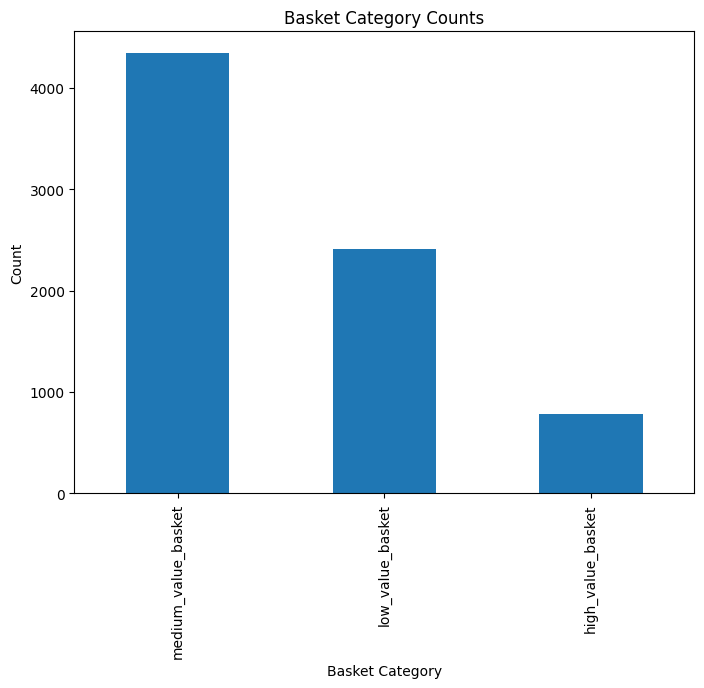

In [ ]:
# Get counts of each basket category
category_counts = data['basket_category'].value_counts()

# Create bar chart
category_counts.plot(kind='bar', figsize=(8,6))
plt.xlabel('Basket Category')
plt.ylabel('Count')
plt.title('Basket Category Counts')
plt.show()

<Axes: >

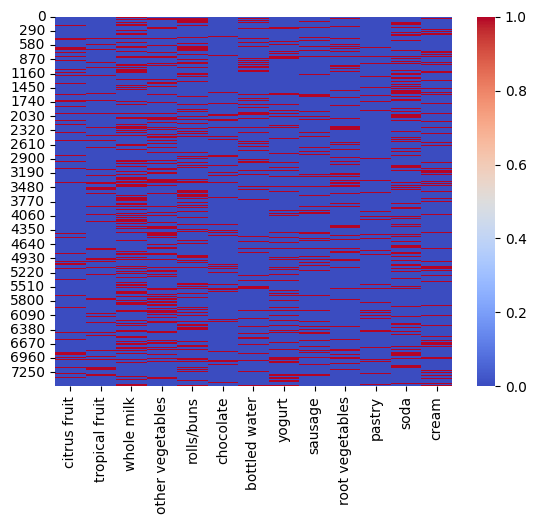

In [ ]:
import seaborn as sns
# Heatmap 

# Select only the item columns
item_cols = data.columns[3:]

# Create a new DataFrame with only the item columns
binary_data_items = data[item_cols]

# Create a heatmap of the binary data
sns.heatmap(binary_data_items, cmap='coolwarm', cbar=True)

**The histograms showed that most customers are buying medium_value_basket portions, while a smaller number of customers are making larger purchases. The heatmap also showed that with our biary data, there are very few customers who buy all of the products in our dataset, while most customers only buy a small number of items.**

# **Exercise 2. Learning association rules with the Apriori method**

## a) We are going to use the Apriori method with various parameters for the minimum support

This is the apriori algorithm for the scratch.

In [ ]:
from collections import defaultdict
from itertools import chain, combinations

In [ ]:
def apriori(itemSetList, minSup, minConf):
    C1ItemSet = getItemSetFromList(itemSetList)
    # Final result, global frequent itemset
    globalFreqItemSet = dict()
    # Storing global itemset with support count
    globalItemSetWithSup = defaultdict(int)

    L1ItemSet = getAboveMinSup(C1ItemSet, itemSetList, minSup, globalItemSetWithSup)
    currentLSet = L1ItemSet
    k = 2

    # Calculating frequent item set
    while(currentLSet):
        # Storing frequent itemset
        globalFreqItemSet[k-1] = currentLSet
        # Self-joining Lk
        candidateSet = getUnion(currentLSet, k)
        # Perform subset testing and remove pruned supersets
        candidateSet = pruning(candidateSet, currentLSet, k-1)
        # Scanning itemSet for counting support
        currentLSet = getAboveMinSup(candidateSet, itemSetList, minSup, globalItemSetWithSup)
        k += 1

    rules = associationRule(globalFreqItemSet, globalItemSetWithSup, minConf,itemSetList)
    rules.sort(key=lambda x: x[2])


    return  rules

In [ ]:
def getUnion(itemSet, length):
    return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])

In [ ]:
def pruning(candidateSet, prevFreqSet, length):
    tempCandidateSet = candidateSet.copy()
    for item in candidateSet:
        subsets = combinations(item, length)
        for subset in subsets:
            # if the subset is not in previous K-frequent get, then remove the set
            if(frozenset(subset) not in prevFreqSet):
                tempCandidateSet.remove(item)
                break
    return tempCandidateSet

In [ ]:
def getAboveMinSup(itemSet, itemSetList, minSup, globalItemSetWithSup):
    freqItemSet = set()
    localItemSetWithSup = defaultdict(int)

    for item in itemSet:
        for itemSet in itemSetList:
            if item.issubset(itemSet):
                globalItemSetWithSup[item] += 1
                localItemSetWithSup[item] += 1

    for item, supCount in localItemSetWithSup.items():
        support = float(supCount / len(itemSetList))
        if(support >= minSup):
            freqItemSet.add(item)

    return freqItemSet

In [ ]:
def associationRule(freqItemSet, itemSetWithSup, minConf,itemSetList):
    rules = []
    for k, itemSet in freqItemSet.items():
        for item in itemSet:
            subsets = powerset(item)
            for s in subsets:
                confidence = float(itemSetWithSup[item] / itemSetWithSup[frozenset(s)])
                support = float(itemSetWithSup[item] / len(itemSetList))
                if(confidence > minConf):
                    rules.append([set(s), set(item.difference(s)), support,confidence])
    return rules


In [ ]:
def getItemSetFromList(itemSetList):
    tempItemSet = set()

    for itemSet in itemSetList:
        for item in itemSet:
            tempItemSet.add(frozenset([item]))

    return tempItemSet

In [ ]:
def powerset(s):
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)))

We are going to define the transactions to use the algorithm

In [ ]:
#Empty list
transactions = []

# Loop through each row in the data frame
for index, row in data.iterrows():
    # Create a list to store the products bought by this customer
    products = []
    # Loop through each of the product columns (Bread, Tost, Milk, Cake, etc.)
    for col in data.columns[3:]:
        # Check if the value is 1 (meaning the customer bought the product)
        if row[col] == 1:
            # Add the product name to the list of products for this customer
            products.append(col)
    # Add the list of products for this customer to the list of transactions
    transactions.append(products)

transactions

[['citrus fruit'],
 ['tropical fruit', 'yogurt'],
 ['whole milk'],
 ['yogurt', 'cream'],
 ['whole milk', 'other vegetables'],
 ['whole milk', 'yogurt'],
 ['rolls/buns'],
 ['other vegetables', 'rolls/buns'],
 ['whole milk'],
 ['tropical fruit', 'other vegetables', 'chocolate', 'bottled water'],
 ['citrus fruit', 'tropical fruit', 'whole milk', 'bottled water', 'yogurt'],
 ['rolls/buns', 'soda'],
 ['tropical fruit'],
 ['chocolate'],
 ['other vegetables'],
 ['pastry'],
 ['whole milk'],
 ['tropical fruit', 'cream'],
 ['tropical fruit', 'other vegetables', 'rolls/buns', 'root vegetables'],
 ['bottled water'],
 ['yogurt'],
 ['rolls/buns', 'chocolate', 'sausage', 'soda'],
 ['other vegetables'],
 ['soda'],
 ['bottled water', 'yogurt'],
 ['other vegetables', 'rolls/buns', 'bottled water'],
 ['whole milk', 'other vegetables', 'root vegetables'],
 ['whole milk', 'other vegetables', 'soda', 'cream'],
 ['pastry', 'soda'],
 ['whole milk', 'other vegetables', 'root vegetables'],
 ['citrus fruit'],
 [

Testing the algorithm

In [ ]:
from tabulate import tabulate

# Run the Apriori algorithm with support value 0.03
rules = apriori(transactions,0.03,0.2)

#rules
df = pd.DataFrame(rules, columns=['Left_Hand_Side', 'Right_Hand_Side','Support','Confidence'])

# Set the index to start from 1
df.index = df.index + 1

#This will print our DataFrame in a pretty SQL-like format
print(tabulate(df, headers='keys', tablefmt='psql'))

+----+-----------------------------------------+------------------------------------+-----------+--------------+
|    | Left_Hand_Side                          | Right_Hand_Side                    |   Support |   Confidence |
|----+-----------------------------------------+------------------------------------+-----------+--------------|
|  1 | {'root vegetables'}                     | {'other vegetables', 'whole milk'} | 0.0302548 |     0.212687 |
|  2 | {'other vegetables', 'root vegetables'} | {'whole milk'}                     | 0.0302548 |     0.48927  |
|  3 | {'other vegetables', 'whole milk'}      | {'root vegetables'}                | 0.0302548 |     0.309783 |
|  4 | {'root vegetables', 'whole milk'}       | {'other vegetables'}               | 0.0302548 |     0.474012 |
|  5 | {'bottled water'}                       | {'rolls/buns'}                     | 0.0315817 |     0.218951 |
|  6 | {'root vegetables'}                     | {'rolls/buns'}                     | 0.0317144 

In [ ]:
# Run the Apriori algorithm with support value 0.003
rules = apriori(transactions,0.003,0.2) 
df = pd.DataFrame(rules, columns=['Left_Hand_Side', 'Right_Hand_Side','Support','Confidence'])

# Set the index to start from 1
df.index = df.index + 1

#This will print our DataFrame in a pretty SQL-like format
print(tabulate(df, headers='keys', tablefmt='psql'))


+------+---------------------------------------------------------------------------+-----------------------------------------+------------+--------------+
|      | Left_Hand_Side                                                            | Right_Hand_Side                         |    Support |   Confidence |
|------+---------------------------------------------------------------------------+-----------------------------------------+------------+--------------|
|    1 | {'chocolate', 'sausage'}                                                  | {'yogurt'}                              | 0.00305202 |     0.239583 |
|    2 | {'root vegetables', 'pastry'}                                             | {'tropical fruit'}                      | 0.00305202 |     0.212963 |
|    3 | {'rolls/buns', 'other vegetables', 'sausage'}                             | {'root vegetables'}                     | 0.00305202 |     0.261364 |
|    4 | {'other vegetables', 'root vegetables', 'sausage'}           

The Apriori algorithm was run with different values of minimum support.The minimum support parameter is the threshold for the frequency of occurrence of an itemset.

1. **For the minimum support 0.03**, the algorithm generated 47 rules.This means that there are 47 associations or patterns of items that frequently appear together in the transactions, and that satisfy the minimum support threshold of 0.3.

2. **For the minimum support was set to 0.003**, the number of rules icreased to 1185. This indicates that more associations meet the higher threshold of minimum support.



## b) We will find the 20 highest confidence rules exclusively for products.

Once we confirmed the Apriori algorithm is functioning correctly, we will proceed to identify the top 20 highest-confidence association rules among the products.For the previous example, a confidence level of 0.2 was used.

Now we are going to keep only the 20 with the higher confidence.

In [ ]:
# Run the Apriori algorithm with support value 0.03 and confidence at 0.2
rules = apriori(transactions, 0.03, 0.2)
df = pd.DataFrame(rules, columns=['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence'])

# Sort by Confidence in descending order and take the top 20 rules
top_20 = df.sort_values(by='Confidence', ascending=False).head(20)

# Set the index to start from 1
top_20.index = top_20.index + 1

# Print the top 20 rules
print(tabulate(top_20, headers='keys', tablefmt='psql'))

+----+-----------------------------------------+----------------------+-----------+--------------+
|    | Left_Hand_Side                          | Right_Hand_Side      |   Support |   Confidence |
|----+-----------------------------------------+----------------------+-----------+--------------|
|  2 | {'other vegetables', 'root vegetables'} | {'whole milk'}       | 0.0302548 |     0.48927  |
|  4 | {'root vegetables', 'whole milk'}       | {'other vegetables'} | 0.0302548 |     0.474012 |
| 40 | {'root vegetables'}                     | {'whole milk'}       | 0.063827  |     0.448694 |
| 39 | {'root vegetables'}                     | {'other vegetables'} | 0.0618365 |     0.434701 |
| 31 | {'tropical fruit'}                      | {'whole milk'}       | 0.0552017 |     0.403101 |
| 43 | {'yogurt'}                              | {'whole milk'}       | 0.0731157 |     0.401603 |
| 41 | {'cream'}                               | {'whole milk'}       | 0.0646231 |     0.388357 |
| 46 | {'o

Here we have the 20 top  rules for high cofidence products with support at 0.03.

## c) Finding the 20 most trusted rules for products and the discretized basket value


We are going to put the Basket_category into the transacts.

In [ ]:
# Empty list
transacts = []

# Loop through each row in the data frame
for index, row in data.iterrows():
    # Create a list to store the products bought by this customer
    products = []
    # Loop through each of the product columns (Bread, Tost, Milk, Cake, etc.)
    for col in data.columns[3:]:
        # Check if the value is 1 (meaning the customer bought the product)
        if row[col] == 1:
            # Add the product name to the list of products for this customer
            products.append(col)
    # Add the basket category to the list of products for this customer
    products.append(row[1])
    # Add the list of products for this customer to the list of transactions
    transacts.append(products)

transacts

[['citrus fruit', 'low_value_basket'],
 ['tropical fruit', 'yogurt', 'medium_value_basket'],
 ['whole milk', 'low_value_basket'],
 ['yogurt', 'cream', 'medium_value_basket'],
 ['whole milk', 'other vegetables', 'low_value_basket'],
 ['whole milk', 'yogurt', 'medium_value_basket'],
 ['rolls/buns', 'low_value_basket'],
 ['other vegetables', 'rolls/buns', 'medium_value_basket'],
 ['whole milk', 'low_value_basket'],
 ['tropical fruit',
  'other vegetables',
  'chocolate',
  'bottled water',
  'medium_value_basket'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'bottled water',
  'yogurt',
  'medium_value_basket'],
 ['rolls/buns', 'soda', 'medium_value_basket'],
 ['tropical fruit', 'low_value_basket'],
 ['chocolate', 'medium_value_basket'],
 ['other vegetables', 'low_value_basket'],
 ['pastry', 'medium_value_basket'],
 ['whole milk', 'low_value_basket'],
 ['tropical fruit', 'cream', 'medium_value_basket'],
 ['tropical fruit',
  'other vegetables',
  'rolls/buns',
  'root vegetabl

Now that is completed we can find the 20 most trusted rules for products and the discretized basket value.

In [ ]:
# Run the Apriori algorithm with support value 0.03 and confidence at 0.2
rules = apriori(transacts, 0.03, 0.2)
df = pd.DataFrame(rules, columns=['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence'])

# Sort by Confidence in descending order and take the top 20 rules
top_20 = df.sort_values(by='Confidence', ascending=False).head(20)

# Set the index to start from 1
top_20.index = top_20.index + 1

# Print the top 20 rules
print(tabulate(top_20, headers='keys', tablefmt='psql'))

+-----+-------------------------------------------+-------------------------+-----------+--------------+
|     | Left_Hand_Side                            | Right_Hand_Side         |   Support |   Confidence |
|-----+-------------------------------------------+-------------------------+-----------+--------------|
| 121 | {'chocolate'}                             | {'medium_value_basket'} | 0.0809448 |     0.721893 |
|  11 | {'whole milk', 'bottled water'}           | {'medium_value_basket'} | 0.0311837 |     0.695266 |
|  88 | {'rolls/buns', 'whole milk'}              | {'medium_value_basket'} | 0.0509554 |     0.689408 |
| 120 | {'pastry'}                                | {'medium_value_basket'} | 0.079087  |     0.681143 |
|  66 | {'root vegetables', 'whole milk'}         | {'medium_value_basket'} | 0.0421975 |     0.661123 |
| 124 | {'root vegetables'}                       | {'medium_value_basket'} | 0.0936837 |     0.658582 |
|  36 | {'soda', 'whole milk'}                    | {'m

Based on the results, we can see that **in most cases**, customers are buying products with a medium-value basket. However, we can also see that one product, cream, has a connection with high-value baskets. Therefore, it is **highly likely** that cream is the most expensive product.

## d) Association rules conclusion

Upon reviewing the association rules, it becomes evident that the majority of customers tend to purchase products that fall within the medium-value basket range. This observation is consistent with the initial summary we produced in Exercise 1, as indicated by the histogram.

### playing around

We are preparing the data for **KNN classification**. We start by selecting the relevant columns for our analysis, which in this case are '`recency_days`' and '`basket_category`'. We then split our data into training and testing sets using the train_test_split function from scikit-learn library, which randomly divides the data into two sets based on the specified test size (in this case, 20% of the data will be used for testing).

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = data[['recency_days', 'basket_category']].values
y = data['basket_category'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

We apply OneHotEncoding to the categorical feature 'basket_category' in both the training and testing dat,then we convert the numerical feature 'recency_days' to numpy arrays for both training and testing data.

In [ ]:
import numpy as np
# apply OneHotEncoding to categorical variable in X_train and X_test
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = ohe.fit_transform(X_train[:, 1].reshape(-1, 1))
X_test_encoded = ohe.transform(X_test[:, 1].reshape(-1, 1))

# convert numerical variable to numpy arrays
X_train_num = X_train[:, 0].reshape(-1, 1)
X_test_num = X_test[:, 0].reshape(-1, 1)

# concatenate encoded and numerical variables
X_train_final = np.concatenate([X_train_encoded.toarray(), X_train_num], axis=1)
X_test_final = np.concatenate([X_test_encoded.toarray(), X_test_num], axis=1)

Using LabelEncoder to convert the categorical variable 'basket_category' into numerical values, which KNN algorithm can understand. We first fit the label encoder on our training set labels (y_train) and then transform both the training and testing set labels (y_train and y_test) into numerical values.

In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_final, y_train)

KNeighborsClassifier()

# Exercise 3. Grouping transactions using k-means method

## a) k-means clustering on basket_category attributes and recency_days

We start by combining two columns from the data dataframe, namely "`recency_days`" and "`basket_category`", into a new dataframe called **cluster_df**.

In [ ]:
# Combine the categorical basket_category column with the recency_days column
cluster_df = pd.concat([data['recency_days'], data['basket_category']], axis=1)
cluster_df.head()

,recency_days,basket_category
0,2,low_value_basket
1,31,medium_value_basket
2,7,low_value_basket
3,7,medium_value_basket
4,66,low_value_basket


Now we have to change our values for the basket_category,the KNN algorithm can not work with values that are not numbers.We are going to transform low_value_basket = 1 medium_value_basket = 2 and high_value_basket = 3

In [ ]:
# Create a dictionary to map categorical values to numerical values
cat_map = {'low_value_basket': 1, 'medium_value_basket': 2, 'high_value_basket': 3}

# Convert categorical values to numerical values using label encoding
cluster_df['basket_category'] = cluster_df['basket_category'].map(cat_map)
cluster_df.head()

,recency_days,basket_category
0,2,1
1,31,2
2,7,1
3,7,2
4,66,1


This code is normalizing the data in the cluster_df dataframe. Normalization is a common preprocessing step in machine learning that scales the data so that it has a mean of 0 and a standard deviation of 1.

In [ ]:
# Normalize the data
scaler = StandardScaler()
cluster_df_scaled = scaler.fit_transform(cluster_df)

print(cluster_df_scaled)

[[-1.42620496 -1.27527315]
 [-0.27135814  0.35279029]
 [-1.22709344 -1.27527315]
 ...
 [-1.38638265  0.35279029]
 [-0.27135814  0.35279029]
 [ 0.08704259  0.35279029]]


We are going now to visual of our data,meaning the cluster_df_scaled

Here's a histogram:

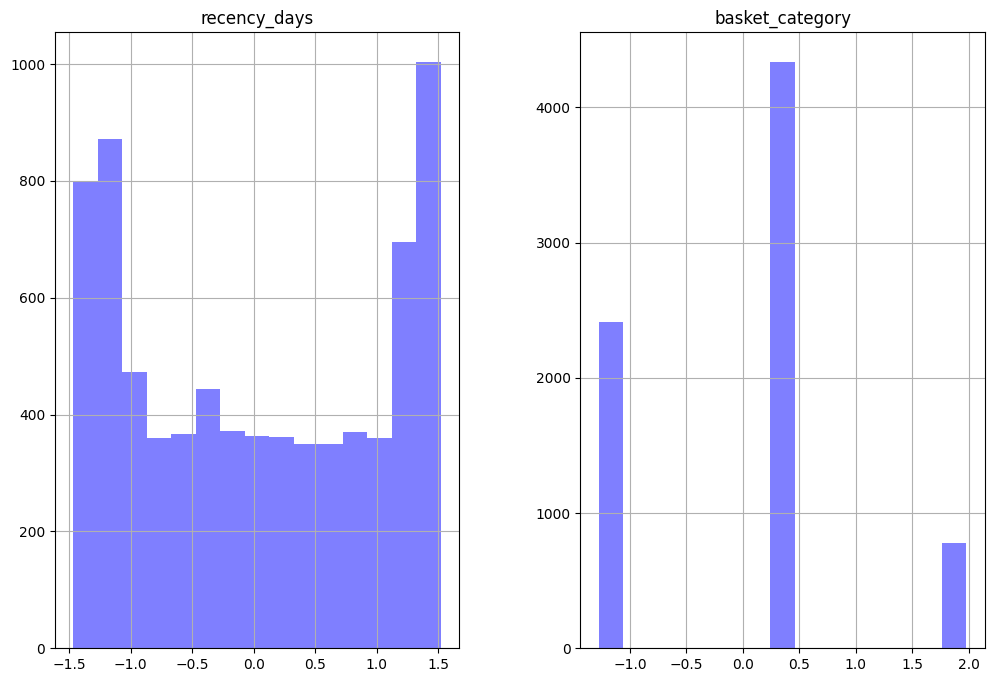

In [ ]:
# Create a new dataframe from scaled data
histogram_cluster = cluster_df_scaled
histogram_cluster = pd.DataFrame(histogram_cluster, columns=cluster_df.columns)

# Plot a histogram of all columns
histogram_cluster.hist(figsize=(12,8), bins=15, color='blue', alpha=0.5)
plt.show()

We can see from the results that we have performed the analysis correctly as it agrees with our previous findings!

Now we performing KMeans clustering on the normalized dataset cluster_df_scaled with 5 clusters provided by the scikit-learn library. The random_state=0 parameter is used to set the random seed for the algorithm, so that the results are reproducible.

In [ ]:
# Perform KMeans clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(cluster_df_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

Visual our results into a scatter:

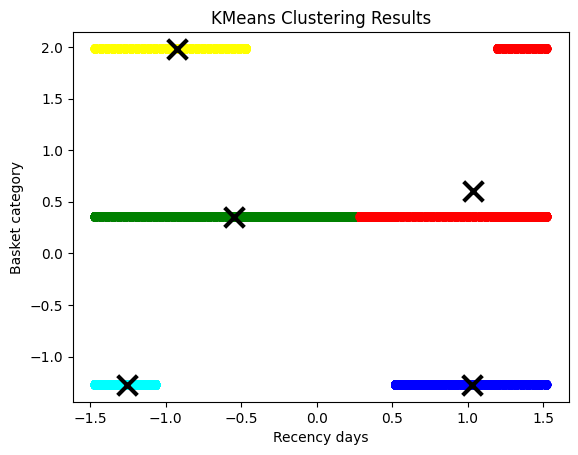

In [ ]:
# Assign a color to each cluster label
colors = ['blue', 'green', 'red', 'cyan', 'yellow']
cluster_colors = [colors[label] for label in kmeans.labels_]

# Plot the data points with the assigned colors
plt.scatter(cluster_df_scaled[:, 0], cluster_df_scaled[:, 1], color=cluster_colors)

# Plot the centroids of each cluster as white crosses
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='black')

plt.title('KMeans Clustering Results')
plt.xlabel('Recency days')
plt.ylabel('Basket category')
plt.show()

## b) Average value and std of clusters

This code assigns a cluster label to each transaction in the original dataset based on the clusters generated by the KMeans algorithm.

More detailed: The kmeans.labels_ attribute returns an array of cluster labels assigned to each data point. Then, assigning this array to a new column in the data DataFrame creates a new column called 'cluster' with the cluster labels for each transaction.

In [ ]:
# Get the labels assigned to each data point
labels = kmeans.labels_

# Add the labels to the original dataset
cluster_df_labeled = cluster_df.copy()
cluster_df_labeled['Cluster'] = labels

# Calculate the mean and standard deviation of each group
group_stats = cluster_df_labeled.groupby('Cluster').agg(['mean', 'std'])

# Create a dictionary to map labels to colors
label_color_map = {0: 'blue', 1: 'green', 2: 'red', 3: 'cyan', 4: 'yellow'}

# Apply the map function to replace labels with colors
group_stats.columns = group_stats.columns.map('_'.join).str.strip()
group_stats.index = group_stats.index.map(lambda x: label_color_map[x])

# Print the results
group_stats


,recency_days_mean,recency_days_std,basket_category_mean,basket_category_std,cluster_mean,cluster_std
Cluster,,,,,,
blue,63.596950,7.177834,1.000000,0.000000,0.0,0.0
green,23.995704,12.616590,2.000000,0.000000,1.0,0.0
red,63.838904,10.696281,2.152877,0.359967,2.0,0.0
cyan,6.298651,3.003922,1.000000,0.000000,3.0,0.0
yellow,14.574553,7.908963,3.000000,0.000000,4.0,0.0


1. **Blue Cluster**: This group has an average number of days since last transaction of around 63.6 days with a low standard deviation of 7.18 days. Additionally,they have an average basket value of 1 and no standard deviation. The cluster mean and standard deviation are both 0. This group might represent customers who rarely make purchases, or only make purchases when they need something specific.

2. **Green Cluster**: The average number of days since the last transaction in this group is much lower than the `Blue Cluster`, with an average of 23.99 days and a higher standard deviation of 12.62 days. They have an average basket value of 2 with no standard deviation. The cluster mean and standard deviation are 1 and 0, respectively. This group might represent customers who make regular but infrequent purchases.

3. **Red Cluster**: This group has an average number of days since the last transaction similar to the `Blue Cluster`, with an average of 63.84 days and a higher standard deviation of 10.70 days. However, they have a higher average basket value of 2.15 and a non-zero standard deviation of 0.36. The cluster mean and standard deviation are 2 and 0, respectively. This group might represent customers who make larger and less frequent purchases.

4. **Cyan Cluster**: This group has the lowest average number of days since the last transaction with an average of 6.30 days and a low standard deviation of 3.00 days. They have an average basket value of 1 with no standard deviation. The cluster mean and standard deviation are 3 and 0, respectively. This group might represent customers who make very frequent purchases, or who make purchases as part of a subscription or loyalty program.

5. **Yellow Cluster**: This group has an average number of days since the last transaction of around 14.57 days and a higher standard deviation of 7.91 days. They have an average basket value of 3 with no standard deviation. The cluster mean and standard deviation are 4 and 0, respectively. This group might represent customers who make regular purchases of multiple items.

From the data, we can infer that there is a distinct cluster, represented by the color red in the graph. 

This cluster stands out because it shows a high value for the basket metric initially, which then drops to more moderate values. Additionally, based on the basket_category_std value of 0.359967, we can deduce that most of the transactions in this cluster involve a similar number of unique product categories purchased, with little variability between them.

## c)